In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import interpolate
%matplotlib notebook

[-12.3,0.0],[-11.3,1.31],[-10.3,1.81],[-9.29,2.17],[-8.29,2.45],[-7.29,2.67],[-6.29,2.85],[-5.29,2.99],[-4.29,3.11],[-3.29,3.2],[-2.29,3.26],[-1.29,3.3],[-0.288,3.32],[0.712,3.31],[1.71,3.27],[2.71,3.21],[3.71,3.13],[4.71,3.02],[5.71,2.88],[6.71,2.73],[7.71,2.56],[8.71,2.37],[9.71,2.17],[10.7,1.96],[11.7,1.73],[12.7,1.49],[13.7,1.24],[17.7,0.193],[17.7,-0.00488],[16.7,-0.0268],[15.7,-0.0645],[14.7,-0.116],[13.7,-0.179],[12.7,-0.251],[11.7,-0.331],[10.7,-0.416],[9.71,-0.505],[8.71,-0.594],[7.71,-0.683],[6.71,-0.768],[5.71,-0.848],[4.71,-0.921],[3.71,-0.985],[2.71,-1.04],[1.71,-1.08],[0.712,-1.1],[-0.288,-1.11],[-1.29,-1.1],[-2.29,-1.09],[-3.29,-1.07],[-4.29,-1.04],[-5.29,-0.998],[-6.29,-0.95],[-7.29,-0.89],[-8.29,-0.816],[-9.29,-0.724],[-10.3,-0.605],[-11.3,-0.437],[-12.3,0.0],[-12.3,0.0]

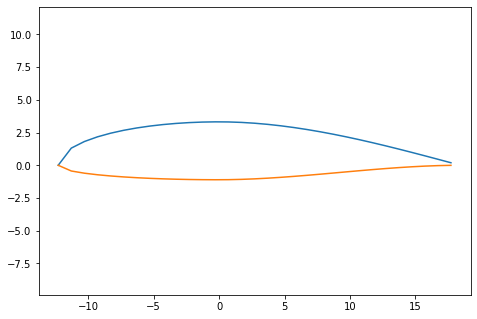

In [2]:


dp=3*25.6
ba=.4*dp#.6*dp
a=.4*ba
b=.18*ba
m=-math.tan(15*2*math.pi/360)

# upper part
# nose - circle
x1=np.arange(-a, 0, 0.2)
y1=.6*b*np.sqrt(1-(x1*x1/(a*a)))
x=np.append(x1, ba-a)
y=np.append(y1, 0)
cs_u = interpolate.CubicSpline(x, y, bc_type=((1,1000), (1, m)))
#lower part
x2=np.arange(-a, 0, 0.2)
y2=-.2*b*np.sqrt(1-(x2*x2/(a*a)))
x_l=np.append(x2, ba-a)
y_l=np.append(y2, 0)
cs_l = interpolate.CubicSpline(x_l, y_l, bc_type=((1,-1000), (1, 0)))

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.axis('equal')

xnew=np.arange(-a, ba-a, 1)

#ax.plot(x,y)
#ax.plot(xnew, f(xnew))
ax.plot(xnew, cs_u(xnew))
ax.plot(xnew, cs_l(xnew))

dy = 1
# create polygon path_upper
last_y = cs_u(xnew[0])
print(f'[{xnew[0]:.3},{last_y:.3}],', end='')
for x in np.nditer(xnew):
    y = cs_u(x)
    if (math.fabs(y-last_y)>dy):
        print(f'[{x:.3},{y:.3}],', end='')
# last_point
last_y = cs_u(xnew[xnew.size-1])
print(f'[{xnew[xnew.size-1]:.3},{last_y:.3}],', end='')

dy=0
# create polygon path_lower
#print(f'[{xnew[xnew.size-1]:.3},{last_y:.3}],', end='')
xnew=xnew[::-1]
#print(xnew)
for x in xnew.tolist():
    #print(x)
    y = cs_l(x)
    if (math.fabs(y-last_y)>dy):
        print(f'[{x:.3},{y:.3}],', end='')
# last_point
last_y = cs_u(xnew[xnew.size-1])
print(f'[{xnew[xnew.size-1]:.3},{last_y:.3}]', end='')


